# Mini-Project - Jorge Olmos, Bo Yun, Yu-Cheol Shin, Siu Wai Yeung 

# Content
* [SVM and LR classification](#SVM-and-LR)

# `SVM and LR classification `<a id='SVM-and-LR'/>

## Data Import and cleaning

In [65]:
## DS info

import pandas as pd
import numpy as np

hotel_bookings = pd.read_csv('~/Desktop/SMU/DS 7331 - Machine Learning 1/Lab 1/Data/hotel_bookings.csv') # read in the csv file

hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/15


In [66]:
import math
import numpy as np
hotel_bookings_transform = hotel_bookings
hotel_bookings_transform= hotel_bookings_transform.drop(columns=['agent','company'])


For the meal attribute during our data investigation, we have found out that '__Undefined__' and '__SC__' are synonymous so we have decided to __replace__ '__Undefined__' with '__SC__'. 


In [67]:
hotel_bookings_transform['meal']= hotel_bookings_transform['meal'].apply(lambda x: 'SC' if  x == 'Undefined'  else x)


For the remainder they appear to have been omitted accidentally and we decided to populate the missing values with the mode.

In [68]:
hotel_bookings[['children','country','market_segment','meal','distribution_channel']].mode() 

,children,country,market_segment,meal,distribution_channel
0,0.0,PRT,Online TA,BB,TA/TO


In [69]:
hotel_bookings_transform['children']= hotel_bookings_transform['children'].apply(lambda x: 0 if  math.isnan(x)  else x)
hotel_bookings_transform['country']= hotel_bookings_transform['country'].apply(lambda x: 'PRT' if  pd.isna(x)  else x)
hotel_bookings_transform['market_segment']= hotel_bookings_transform['market_segment'].apply(lambda x: 'Online TA' if  x == 'Undefined'  else x)
hotel_bookings_transform['distribution_channel']= hotel_bookings_transform['distribution_channel'].apply(lambda x: 'TA/TO' if  x == 'Undefined'  else x)

hotel_bookings_transform['hotel']=hotel_bookings_transform['hotel'].astype('category').cat.codes
hotel_bookings_transform['market_segment']=hotel_bookings_transform['market_segment'].astype('category').cat.codes
hotel_bookings_transform['meal']=hotel_bookings_transform['meal'].astype('category').cat.codes
hotel_bookings_transform['reservation_status']=hotel_bookings_transform['reservation_status'].astype('category').cat.codes
hotel_bookings_transform['distribution_channel']=hotel_bookings_transform['distribution_channel'].astype('category').cat.codes
hotel_bookings_transform['reserved_room_type']=hotel_bookings_transform['reserved_room_type'].astype('category').cat.codes
hotel_bookings_transform['assigned_room_type']=hotel_bookings_transform['assigned_room_type'].astype('category').cat.codes
hotel_bookings_transform['deposit_type']=hotel_bookings_transform['deposit_type'].astype('category').cat.codes
hotel_bookings_transform['customer_type']=hotel_bookings_transform['customer_type'].astype('category').cat.codes
assign_month = {"arrival_date_month": {"January": 1, "February": 2, "March": 3, "April": 4,"May": 5,"June": 6,"July": 7,"August": 8,"September": 9,"October": 10,"November": 11,"December": 12}}
hotel_bookings_transform = hotel_bookings_transform.replace(assign_month)
#TODO: modify this code with hotel_bookings
hotel_bookings_transform=hotel_bookings_transform.assign(booking_date = hotel_bookings_transform["arrival_date_year"].astype(str) + '-' + 
hotel_bookings_transform["arrival_date_month"].astype(str) + '-' +hotel_bookings_transform["arrival_date_day_of_month"].astype(str))
hotel_bookings_transform['booking_date']=pd.to_datetime(hotel_bookings_transform.booking_date)



# Linear SVM

### Data normalization
- SVM tries to maximize the distance between the support vectors and the separating plane. 
- Prior to conducting SVM, we need to normalize the dataset so we can get rid of bias and dominance of certain features over others. 
- The result of applying normalized dataset will be having the same influence on the distance metric, thus boosting the accuracy of the model. 

In [70]:
# Defining input variables and target variable
X=hotel_bookings_transform.drop('is_canceled',axis=1)
y=hotel_bookings_transform.is_canceled

In [71]:
# We can't convert "reservation_status_date", "country", "booking_date" into a float so decided to delete them from the dataset 
del X['reservation_status_date']
del X['country']
del X['booking_date']

In [72]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
scaler

scaler.mean_
scaler.scale_

X_scaled = scaler.transform(X)

In [73]:
# Checking the mean of the scaled x_test dataset. Should be zero mean.  
X_scaled.mean(axis=0)

array([-7.99873890e-17,  6.09427725e-17, -8.40629369e-14, -7.61784657e-18,
       -1.29503392e-16,  2.47580013e-17,  1.19743026e-16, -2.76146938e-17,
        3.23758479e-17, -3.99936945e-17,  2.04729627e-17, -2.28535397e-17,
        2.47580013e-17,  3.23758479e-17,  9.52230821e-18, -3.14236171e-17,
        2.04729627e-17, -3.38041941e-17,  6.95128499e-17,  3.42803096e-17,
        1.90446164e-18,  3.90414637e-17,  3.72322251e-16,  2.51388937e-16,
       -5.71338493e-18, -5.33249260e-17,  7.61784657e-17])

In [74]:
# Checking the variance of the scaled x_test dataset. Should be unit variance. 
X_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [75]:
X_scaled.shape

(119390, 27)

In [76]:
y.shape

(119390,)

In [83]:
# Splitting dataset into training and test data set in 80:20 ratio

from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size=0.2,random_state=0)   

# Quality check of training and test dataset dimension
print("shape of original dataset :", hotel_bookings_transform.shape)
print("shape of input - training set", X_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", X_test.shape)
print("shape of output - testing set", y_test.shape)

shape of original dataset : (119390, 31)
shape of input - training set (95512, 27)
shape of output - training set (95512,)
shape of input - testing set (23878, 27)
shape of output - testing set (23878,)


In [82]:
X_scaled = pd.DataFrame(scaler.transform(X_train),columns=columns)
X_scaled.sample(frac=0.1, replace=False, random_state=10)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [84]:
# Using pipeline to apply the same scaling on the training set
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pipe.fit(X_train, y_train)  # apply scaling on training data
Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

# apply scaling on testing data, without leaking training data.
print("Pipe score:",pipe.score(X_test, y_test))

Pipe score: 0.9988273724767568


#### Case 1 : No standardization of dataset

In [32]:
# Import linear svm model
from sklearn import svm

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X, y,test_size=0.2,random_state=0)

# Create a svm Classifier called "lin"
raw = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using the training sets
raw.fit(X_train_raw, y_train_raw)

# Make prediction for test dataset
y_pred_raw = raw.predict(X_test_raw)

In [29]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics


# Model Accuracy
print("Accuracy for linear SVM:",metrics.accuracy_score(y_test_raw, y_pred_raw))

Accuracy for linear SVM: 0.9892369545188039


#### Case 2 : With standardization of dataset

In [19]:
# Import linear svm model
from sklearn import svm

# Create a svm Classifier called "lin"
lin1 = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using the training sets
lin1.fit(X_train, y_train)

# Make prediction for test dataset
y_pred_lin1 = lin1.predict(X_test)

In [20]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_lin1)

array([[14934,     0],
       [  257,  8687]])

In [23]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics


# Model Accuracy
print("Accuracy for linear SVM:",metrics.accuracy_score(y_test, y_pred_lin1))

Accuracy for linear SVM: 0.9892369545188039


In [24]:
# Checking the support vector positions
lin.support_vectors_

array([[ 1.40722407, -0.97331871,  1.19219514, ..., -0.25487288,
        -0.72069411,  0.70352647],
       [-0.71061889,  0.56136156, -1.63476794, ..., -0.25487288,
        -0.72069411,  0.70352647],
       [ 1.40722407, -0.97331871, -1.63476794, ..., -0.25487288,
        -0.72069411,  0.70352647],
       ...,
       [ 1.40722407, -0.89845626, -1.63476794, ..., -0.25487288,
         0.54066585, -1.30541936],
       [-0.71061889, -0.46799716, -1.63476794, ..., -0.25487288,
         0.54066585,  2.71247229],
       [-0.71061889,  0.00925097, -1.63476794, ..., -0.25487288,
         3.06338577, -1.30541936]])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


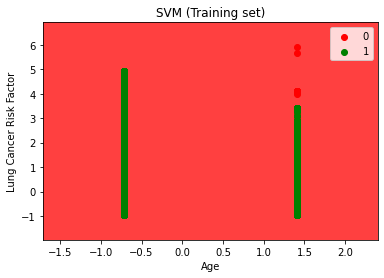

In [161]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
Xpred = np.array([X1.ravel(), X2.ravel()] + [np.repeat(0, X1.ravel().size) for _ in range(25)]).T
# Xpred now has a grid for x1 through x27(the entire features for the training set)
pred = lin.predict(Xpred).reshape(X1.shape)   # is a matrix of 0's and 1's !
plt.contourf(X1, X2, pred,
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Lung Cancer Risk Factor')
plt.legend()
plt.show()



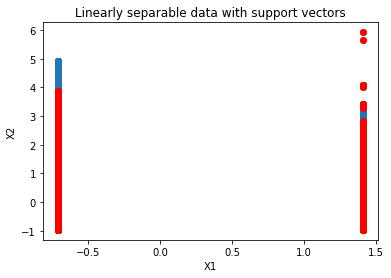

In [26]:
# Get support vectors themselves
import matplotlib. pyplot as plt

support_vectors = lin.support_vectors_

# Visualize support vectors
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

#### Hypertuning parameters for C

In [29]:
# Hypertuning parameters for C

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
params_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
           

#Create the GridSearchCV object
grid_lin = GridSearchCV(SVC(class_weight='balanced'), params_grid)

#Fit the data with the best possible parameters
grid_lin = lin.fit(X_train, y_train)


AttributeError: 'SVC' object has no attribute 'best_estimators'

In [39]:
#Print the best estimator with it's parameters
grid_lin.best_params

AttributeError: 'SVC' object has no attribute 'best_params'

# Non-linear Radial Basis Function(RBF) SVM
- We decided to perform a Non-linear Kernel SVM and compare the result with the linear SVM. 
- With RBF, tuning hyperparameters, such as gamma(controls the size of the radial basis function kernel) and C(margin hardness), are allowed to find the optimal model setting. 
- We will explore different combinations of gamma and C to see which one gives us the best accuracy. 



In [5]:
# from sklearn import svm
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV
# params_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
#           'gamma': [0.0001, 0.001, 0.01, 0.1]}
           

# #Create the GridSearchCV object
# grid_lin = GridSearchCV(SVC(class_weight='balanced'), params_grid)

# #Fit the data with the best possible parameters
# grid_lin = lin.fit(X_train, y_train)

# #Print the best estimator with it's parameters
# grid_lin.best_estimators

NameError: name 'clf' is not defined

#### Case 1 : Gamma = 0.1, C= 0.02

In [31]:
# First case with gamma= 0.01 and C=0.02
rbf1 = SVC(kernel='rbf', random_state=1, gamma=0.1, C=0.02)
rbf1.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_rbf1 = rbf1.predict(X_test)

# Model Accuracy
print("Accuracy for Case 1 (gamma = 0.1, C= 0.02) of RBF SVM:",metrics.accuracy_score(y_test, y_pred_rbf1))

Accuracy for Case 1 (gamma = 0.1, C= 0.02) of RBF SVM: 0.9699304799396934


#### Case 2 : Gamma = 1, C= 0.02

In [ ]:
# First case with gamma= 1 and C=0.02
rbf1 = SVC(kernel='rbf', random_state=1, gamma=0.1, C=0.02)
rbf1.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_rbf1 = rbf1.predict(X_test)

# Model Accuracy
print("Accuracy for Case 1 (gamma = 0.1, C= 0.02) of RBF SVM:",metrics.accuracy_score(y_test, y_pred_rbf1))

#### Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.812, total=10.6min
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 10.6min remaining:    0.0s


In [ ]:
print(grid.best_params_) 

ValueError: X.shape[1] = 2 should be equal to 27, the number of features at training time

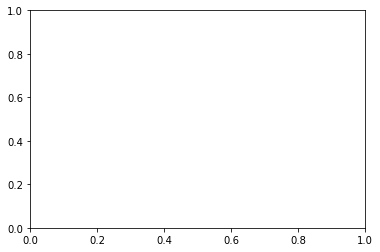

In [109]:
# # Visualize the decision boundaries
# from sklearn.decomposition import PCA
# from mlxtend.plotting import plot_decision_regions

npy = np.asarray(y_train, dtype=np.int)
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
clf.fit(X_train2, y_train)
plot_decision_regions(X_train2, npy, clf=svm, legend=2)

# plt.xlabel(X.columns[0], size=14)
# plt.ylabel(X.columns[1], size=14)
# plt.title('SVM Decision Region Boundary', size=16)

In [58]:
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
import numpy as np
from sklearn.model_selection import ShuffleSplit


tuned_parameters =  [{
    'alpha': [1e-1, 1e0, 1e1], # learning rate
    'max_iter': [1000], # number of epochs
    'loss': ['hinge'], # svm,
    'penalty': ['l2'],
    'n_jobs': [-1]
}]


svm_estimator = SGDClassifier()

svmGridSearch = GridSearchCV(estimator=svm_estimator
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=tuned_parameters
                   , scoring='f1')

svmGridSearch.fit(X_train, y_train)

means = svmGridSearch.cv_results_['mean_test_score']
stds = svmGridSearch.cv_results_['std_test_score']

y_true, y_pred = y_test, svmGridSearch.predict(X_test)
print(classification_report(y_true, y_pred))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  15 out of  15 | elapsed:    1.8s finished


              precision    recall  f1-score   support

           0       0.98      1.00      0.99     14934
           1       1.00      0.97      0.99      8944

    accuracy                           0.99     23878
   macro avg       0.99      0.99      0.99     23878
weighted avg       0.99      0.99      0.99     23878

